<a href="https://colab.research.google.com/github/rkhiar/IA/blob/master/RKH_Chapter_2_2_Logistic_Regression_and_SoftMax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2.2: Logistic Regression


*  Logistic regression is a ***classification***  model that relate  ***categorical*** output to a weighted sum of ***numerical*** inputs.

## Binary Case


* An example of binary logistic regression could be the prediction of the ***Age_Category*** (Child or Adult) from the ***Weight*** and ***Height***.

* The model is defined by the green line  (plane for $3$ inputs and hyperplane for more) that separates between the two categories of points.




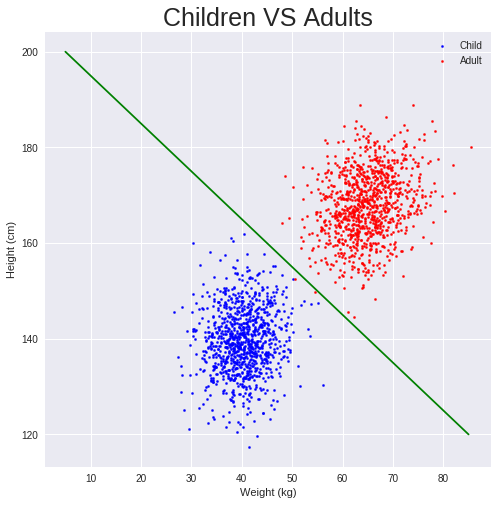

In [0]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
children = np.random.multivariate_normal(np.array([40,140]), 
                                         np.array([[20,1],
                                                   [1,50]]),
                                                   n)
adults = np.random.multivariate_normal(np.array([65, 168]),
                                       np.array([[30,10],
                                                 [10,50]]),
                                                 n)
plt.figure(figsize = (8,8))
plt.scatter(children[:,0],children[:,1], marker = 'o', 
            color = 'blue', s = 5, label = 'Child')
plt.scatter(adults[:,0],adults[:,1], marker = 'o',
            color = 'red', s = 5, label = 'Adult')
reg_line_x = np.arange(5,85,0.001)
plt.plot(reg_line_x, -1*reg_line_x+ 205, color = 'green')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Children VS Adults', fontsize = 25)
plt.legend(loc = 'upper right')
plt.show()


* The equation of the green line is

\begin{equation}
Height = - Weight + 205 \iff  Weight + Height  - 205 = 0.
\end{equation}

* To predict $Age\_category$ from $Weight$ and $Height$ values we define 

\begin{equation}
f(Weight,Height) = Weight + Height  - 205
\end{equation}

* such that:

  * $f(Weight,Height) = 0$ means the point defined by $(Weight,Height)$ lies ***on*** the green line;
  
  * $f(Weight,Height) \geq 0$ means the point lies ***above*** the green line and thus  belongs to the class of ***Adults***;
  
  * $f(Weight,Height) \leq 0$ means the point lies ***below*** the green line and thus belongs to the class of ***Children***.
  
  
* In order to translate the score of belonging to one class or another into a probability of belonging we plug the score obtained by $f(Weight,Height)$ into a ***Logistic Function*** $\sigma$ to obtain the probability that a given person is an Adult like follows


\begin{equation}
P(y = Adult | Weight, Height) = \frac{1}{1 + e^{-f(Weight,Height)}}.
\end{equation}
  

* Indeed we can see from the plot below of the logistic function $\sigma$ that any $z \in {\rm I\!R}$ is turned into a $\sigma(z) \in [0,1]$


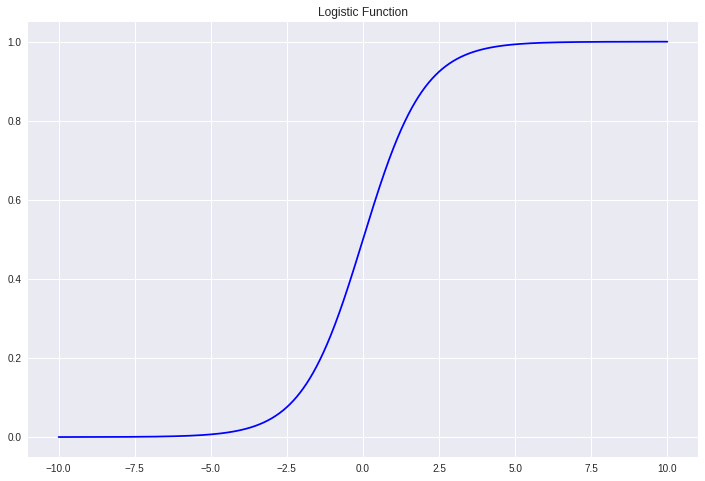

In [0]:
z = np.arange(-10,10,0.001)
plt.figure(figsize = (12,8))
plt.plot(z, 1/(1+np.exp(-z)), 'blue')
plt.title('Logistic Function')
plt.show()

*  Formally speaking we define binary logistic regression  the probability that $\bf{x} = [x_1,\ldots,x_d]$ belongs to the class $1$ 

\begin{equation}
P(y = 1) = \frac{1}{1 - e^{-(\bf{w}^T\bf{x} + b})},
\end{equation}

* where $w^T \in  {\rm I\!R}^d$ is the vector of weights and $b \in  {\rm I\!R}$ is the bias.

## Multivariate Case (Softmax Regression)





* Softmax regression is the extension  of binary logistic regression over $k$ classes.

* In the example of $Age\_category$:
  * We compute for a given $[Weight, Height]$ the belonging probability to the Adult class;
  
  * The belonging probability to the Children class is deduced by the complement rule of probability $1 - P(Adult | Weight, Height)$; 
  
  *  In Softmax Regression we compute the belonging probability to both classes  as an array $[P(Adult | Weight, Height), P(Child | Weight, Height)]$;
  
* Formally speaking, softmax regression is a $k$-categorical classifier which for a given input $\bf{x}$ computes $k$ scores

\begin{equation}
\begin{bmatrix}
w_{11} & \ldots & w_{1d}\\
\vdots & \ddots & \vdots\\
w_{k1} & \ldots & w_{kd}
\end{bmatrix}
\begin{bmatrix}
x_1 \\
\vdots\\
x_d
\end{bmatrix} + 
\begin{bmatrix}
b_1\\
\vdots\\
b_k
\end{bmatrix}
= 
\begin{bmatrix}
s_1\\
\vdots\\
s_k
\end{bmatrix}.
\end{equation}


* The score vector $\bf{s} = [s_1,\ldots,s_k]^T$ is transformed into probabilities through the ***softmax*** function


\begin{equation}
softmax(s_j) = \frac{e^{s_j}}{\sum_{i = 1}^{k} e^{s_i}}.
\end{equation}


* The complete softmax model is given by

\begin{equation}
\begin{bmatrix}
P(y = 1 | \bf{x})\\
\vdots\\
P(y = k | \bf{x})\\
\end{bmatrix}
=
softmax(\bf{W} \bf{x} + \bf{b}),
\end{equation}

* where $\bf{W}$ is the $k \times d$ matrix containing the weights for every class/dimension and $\bf{b} \in  {\rm I\!R^k}$ is the biais vector.


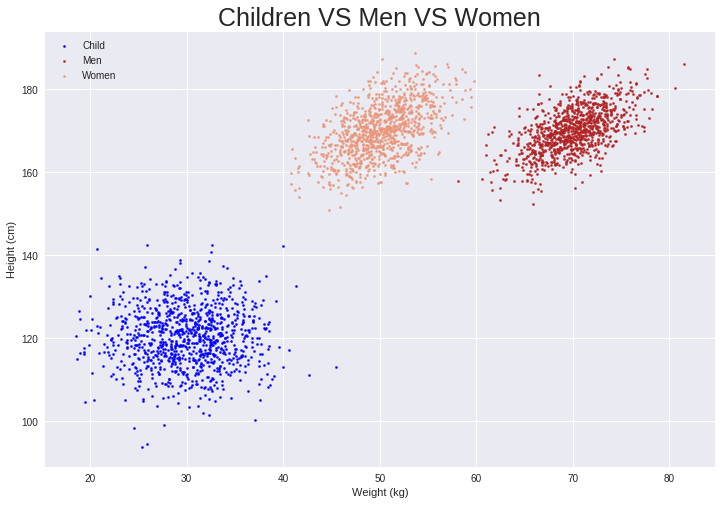

In [0]:
import matplotlib.pyplot as plt

n = 1000
children = np.random.multivariate_normal(np.array([30,120]), 
                                         np.array([[20,1],
                                                   [1,50]]),
                                                   n)
men = np.random.multivariate_normal(np.array([70, 170]),
                                       np.array([[10,10],
                                                 [10,30]]),
                                                 n)
women = np.random.multivariate_normal(np.array([50,170]),
                                      np.array([[10,10],
                                                [10,40]]),
                                                 n)
plt.figure(figsize = (12,8))
plt.scatter(children[:,0],children[:,1], marker = 'o', 
            color = 'blue', s = 5, label = 'Child')
plt.scatter(men[:,0],men[:,1], marker = 'o',
            color = 'firebrick', s = 5, label = 'Men')
plt.scatter(women[:,0],women[:,1], marker = 'o',
            color = 'darksalmon', s = 5, label = 'Women')
#reg_line_x = np.arange(5,85,0.001)
#plt.plot(reg_line_x, -1*reg_line_x+ 205, color = 'green')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Children VS Men VS Women', fontsize = 25)
plt.legend(loc = 'upper left', prop={'size': 10})
plt.show()

# Loss Function for Classification Models

## Matrix Formalization for Softmax Regression

* Softmax classifiers are trained in a supervized way through  $n \times d$-dimensional inputs and $n \times k$-dimensional outputs 


\begin{equation}
\bf{X} = 
\begin{bmatrix}
x_{11} & \ldots & x_{1d}\\
\vdots & \ddots  & \vdots \\
x_{n1} &\ldots & x_{nd}
\end{bmatrix},
\bf{P} =
\begin{bmatrix}
p_{11} & \ldots & p_{1k}\\
\vdots & \ddots & \vdots \\
p_{n1} & \ldots & p_{nk}
\end{bmatrix},
\end{equation}



* The $i^{th}$  row of  $\bf{X}$ is associated to  the $i^{th}$ input example.

* The entry $\bf{P}_{ij}$ describes the probability that  $i^{th}$ input belongs to the $j^{th}$ class.

* The matrix representation of $\bf{P}$ gives the opportunity for an input $\bf{X}_{i,:}$ to be associated to several classes with different scores.

* When inputs $\bf{X}_{i,:}$ belong to only one class at the time then the rows of $\bf{P}$ are called ***One Hot*** vectors.  

* We define $\bf{\hat{P}} = softmax(\bf{W} \bf{X}^T + \bf{b})$ as the matrix of probabilities obtained with some given  parameters $\bf{W}$ and $\bf{b}$ 

\begin{equation}
\bf{\hat{P}} = 
\begin{bmatrix}
\hat{p}_{11} & \ldots & \hat{p}_{1k}\\
\vdots & \ddots & \vdots \\
\hat{p}_{n1} & \ldots & \hat{p}_{nk}
\end{bmatrix}= 
softmax 
\begin{bmatrix}
\begin{bmatrix}
w_{11} & \ldots & w_{1d}\\
\vdots & \ddots & \vdots\\
w_{k1} & \ldots & w_{kd}
\end{bmatrix}
\begin{bmatrix}
x_{11} & \ldots & x_{n1}\\
\vdots & \ddots  & \vdots \\
x_{1d} &\ldots & x_{nd}
\end{bmatrix}+
\begin{bmatrix}
b_1\\
\vdots\\
b_k 
\end{bmatrix}
\end{bmatrix}.
\end{equation}

* Finally the predicted classes are given by the vector $\bf{\hat{Y}}$ where each entry $i$ corresponds to the index of the maximum probability in the $i^{th}$ row of $\bf{\hat{P}}$

\begin{equation}
\bf{\hat{Y}} =
\begin{bmatrix}
\hat{y}_1\\
\vdots\\
\hat{y}_n\\
\end{bmatrix} =
argmax
\begin{bmatrix}
\bf{\hat{P}}_{1,:}\\
\vdots\\
\bf{\hat{P}}_{n,:}\\
\end{bmatrix}.
\end{equation}


## Negative Log-Likelihood Loss Function

* We define $J(\bf{W}, \bf{b})$ as the negative log-likelihood  function that quantifies the performance in terms of errors of the classifier given some  input parameters. 

\begin{equation}
J(\bf{W}, \bf{b}) = \frac{1}{n}\sum_{i = 1}^n \sum_{j = 1}^k -p_{i,j} \log(\hat{p}_{i,j}),
\end{equation}

* where:

  * $p_{i,j}$ is the true probability that the $i^{th}$ input $\bf{X}_{i,:}$ belongs to the $j^{th}$ class;
  * $\hat{p}_{i,j}$ is the true probability that the $i^{th}$ input $\bf{X}_{i,:}$ belongs to the $j^{th}$.
  
* Let's ponder over the equation above :
   * If  $P_{i,:}$ are one-hot vectors then  $p_{i,y_i} = 1$  and $\{p_{i,j} = 0, j \neq y_i\}$ thus the sum $\sum_{j = 1}^k - p_{i,j} \log(\hat{p}_{i,j}) = - \log(\hat{p}_{i,y_i})$.
  * If the predicted probability $\hat{p}_{i,y_i}$ tends to $1$ its $\log$  tends to $0$ (see red plot below);
  * If nonetheless the predicted probability $\hat{p}_{i,y_i}$ tends to $0$ then its $\log$  will tend towards $- \infty$ (see red plot below);
  * from this we get that the less precise we predict $\hat{p}_{i,y_i}$ the bigger will be $- \hat{p}_{i,j}$ and vice versa (see blue plot below).
  * The operation  $ \frac{1}{n}\sum_{i = 1}^n$ produces an average of the negative log-likelihoods.
  
  *  In the case  $P_{i,:}$ are not one-hot vectors the mechanisms described above still apply.
  
  * The Negative Log-Likelihood function is also called ***Cross-Entropy*** loss function.

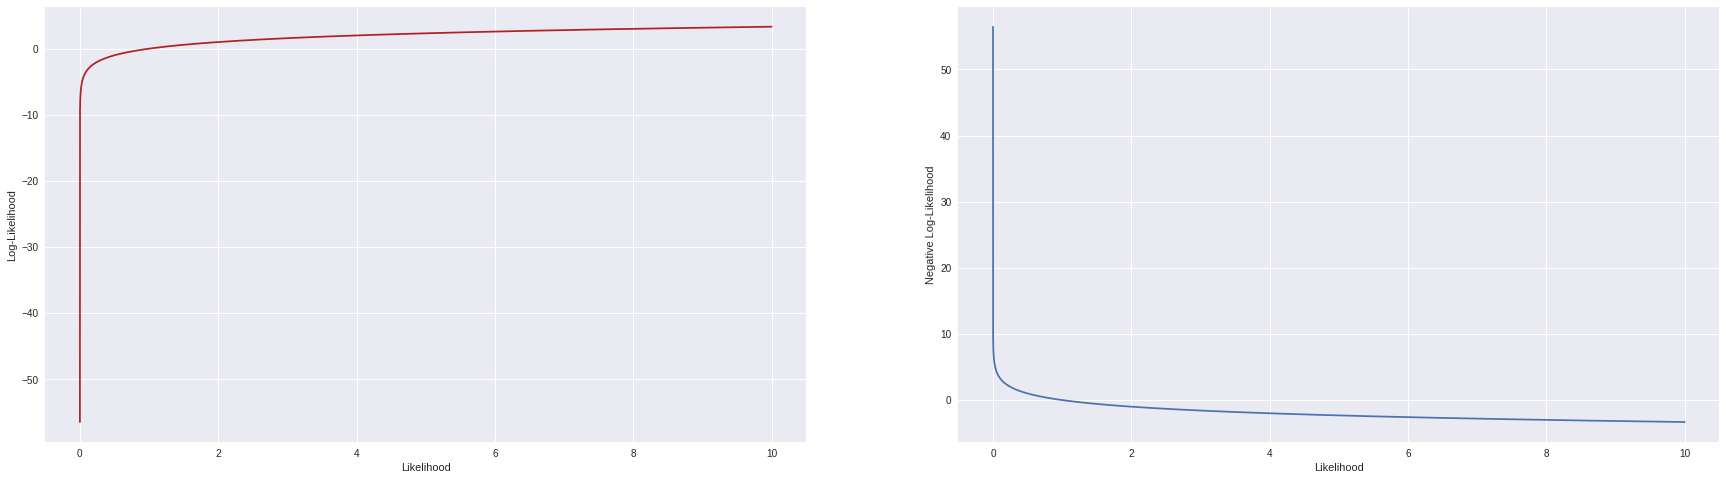

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.00000000000000001,10,0.00001)
plt.figure(figsize = (30,8))
plt.subplot(1,2,1)
plt.plot(x, np.log2(x), 'firebrick') 
plt.xlabel("Likelihood")
plt.ylabel("Log-Likelihood")

plt.subplot(1,2,2)
plt.plot(x, -1*np.log2(x))
plt.xlabel("Likelihood")
plt.ylabel("Negative Log-Likelihood")

plt.show()

* In  Softmax regression the function $J(\bf{W}, \bf{b})$ can be expressed directly with the parameters as follows

\begin{equation}
J(\bf{W}, \bf{b}) = \frac{1}{n}\sum_{i = 1}^n \sum_{j = 1}^k -p_{i,j} \log \left( \frac{e^{\bf{W}_{j,:}\bf{X}_{:,i}^T + b_j } }{\sum_{l = 1}^k e^{\bf{W}_{l,:}\bf{X}_{:,i}^T + b_l} }  \right).
\end{equation}

## Minimization of Negative Log-Likelihood 

* The parameters $\bf{W}, \bf{b}$ are estimated with Gradient Descent through the derivative of the Negative Log-Likelihood Loss Function (cross entropy).

* Except the gradient formula, the algorithm remains  the same as the one described in Linear Regression.

* Let's first focus on the Negative Log-Likelihood Loss Function derivative,  then implement Gradient Descent to estimate the Softmax Regression able to classify the $3$ classes ploted below. \\


### Negative Log-Likelihood Loss Function derivative : 
The Negative Log-Likelihood Loss Function derivative uses those tree matrices  $ \hat{p} $ ,   $ {X}_{i,j} $ and  $ W $ defined as : \\

\begin{equation}
\bf{\hat{P}} = 
\begin{bmatrix}
\hat{p}_{11} & \ldots & \hat{p}_{1k}\\
\vdots & \ddots & \vdots \\
\hat{p}_{n1} & \ldots & \hat{p}_{nk}
\end{bmatrix} ,
\bf{X} = 
\begin{bmatrix}
x_{11} & \ldots & x_{1d} & 1\\
\vdots & \ddots  & \vdots & \vdots \\
x_{n1} &\ldots & x_{nd} & 1
\end{bmatrix},
\bf{W} = 
\begin{bmatrix}
w_{11} & \ldots & w_{1k}\\
\vdots & \ddots  & \vdots \\
w_{d1} &\ldots & w_{dk} \\
b_{1} &\ldots & b_{k} 
\end{bmatrix}
\end{equation} 



* Each column of  $ \hat{p} $  represent the probability, for a line (point) $ i $,  of belonging to a $ j $ class.  
Where   $ i_{i = 1}^n $ and $ j_{j = 1}^k $.

* Each line of $ {X}_{i,s} $ represent a single point and each column a feature  $ s $  where   $ s_{s = 1}^d $ in matrice $ {X}_{i,s} $ .

* Each column of $ W $ represent a class/concept weights.

* Last column of $ {X}_{i,s} $ and last line of   $ W $  are equal to 1 and added for the ***bias*** calculation matter. 


* The softmax derivative :

\begin{equation}
\frac{\partial  \hat{p}_{:,j}  }{\partial {W}_{s,c}} ={ \hat{p}_{:,j} }(\delta-{  \hat{p}_{:,c} }){X}_{:,s}  ~~~ ,  ~~~ s_{s = 1}^d ~ c_{c = 1}^k
\\
\end{equation}
\begin{equation}
\textbf {where}: \\ δ=1 ~ when ~ j=c ~  \\  δ=0 ~ when  ~  j \ne c 
\end{equation} \\



* The Negative Log-Likelihood Loss Function derivative \\

\begin{equation}
J(\bf{W}, \bf{b}) = \frac{1}{n}\sum_{i = 1}^n \sum_{j = 1}^k -p_{i,j} \log(\hat{p}_{i,j})
\end{equation} \\


\begin{equation}
\frac{\partial J(\bf{W}, \bf{b})}{\partial {W}_{s,c}}= \frac{1}{n}\sum_{i = 1}^n \sum_{j = 1}^k \frac{-p_{i,j}}{\hat{p}_{i,j}}  \frac{\partial  \hat{p}_{i,j}  }{\partial {W}_{s,c}} 
\end{equation} \\

\begin{equation}
Replacing ~~ \frac{\partial  \hat{p}_{i,j}  }{\partial {W}_{s,c}} ~~ by ~ it's ~ formula ~ gives : 
\end{equation} \\


\begin{equation}
\frac{\partial J(\bf{W}, \bf{b})}{\partial {W}_{s,c}}= \frac{1}{n}\sum_{i = 1}^n \sum_{j = 1}^k \frac{-p_{i,j}}{\hat{p}_{i,j}}  { \hat{p}_{i,j} }(\delta-{  \hat{p}_{i,c} }){X}_{i,s}
\end{equation} \\

\begin{equation}
\textbf {where}: \\ δ=1 ~ when ~ j=c ~  \\  δ=0 ~ when  ~  j \ne c  \\ s_{s = 1}^d ~ c_{c = 1}^k
\end{equation} \

gradient descent
16502
(array([[ 0.88445655,  0.50365225, -1.3881088 ],
       [ 1.42541551, -0.55654433, -0.86887118],
       [ 0.2488207 , -0.82228086,  0.57346016]]), 0.009999897256678294)


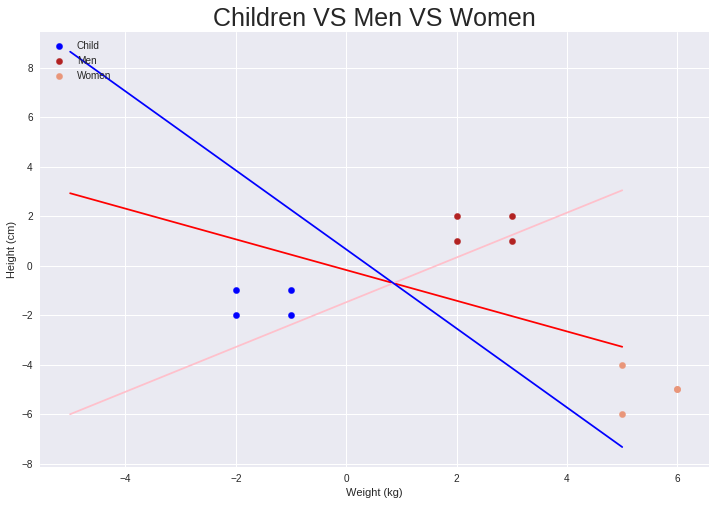

In [0]:
import numpy as np
import matplotlib.pyplot as plt


men=np.array([[2,1], [2,2], [3,1], [3, 2]]).reshape([4,2])
children=np.array([[-1,-1], [-1,-2], [-2,-1], [-2, -2]]).reshape([4,2])
women=np.array([[5,-4], [6,-5], [6,-5], [5, -6]]).reshape([4,2])


# matrix X definition
X=np.vstack((men, women, children))
X=np.hstack((X, np.ones((np.shape(X)[0],1))))


# matrix P definition. It contains the true probability that an input belongs to a given category
p1=np.hstack((np.ones((np.shape(men)[0],1)), np.zeros((np.shape(men)[0],1)), np.zeros((np.shape(men)[0],1))))
p2=np.hstack((np.zeros((np.shape(women)[0],1)), np.ones((np.shape(women)[0],1)), np.zeros((np.shape(women)[0],1))))
p3=np.hstack((np.zeros((np.shape(children)[0],1)), np.zeros((np.shape(children)[0],1)), np.ones((np.shape(children)[0],1))))
P=np.vstack((p1,p2,p3))


# Weights matrix definition
w=np.zeros([3,3], dtype='float64')


# Score fonction definition
def score(weights, inputs):
    
    return inputs.dot(weights)



# Softmax fonction definition
def softmax(sc):
          
    matSoft=np.exp(sc-np.max(sc,axis=1).reshape((np.shape(sc)[0],1)))/np.sum(np.exp(sc-np.max(sc,axis=1).reshape((np.shape(sc)[0],1))), axis=1).reshape((np.shape(sc)[0],1))
    
    return matSoft



# Cross entropy loss fonction definition
def crossEntropy(outputs, inputs, weights):
    
    res=(1/np.shape(outputs)[0])*(np.sum(-outputs*np.log(softmax(score(weights,inputs)))))
    
    return res



# Derivative of cross entropy fonction
def derivCross(weights, soft, inputs, outputs):
    derive=np.ones((np.shape(soft)[0], 1))
    res=np.array(weights)
    
    j=0
    while j<np.shape(weights)[1]:
        i=0
        while i<np.shape(weights)[0]:
            derive=np.ones((np.shape(soft)[0], 1))   
            
            if j>0:
                derive=np.hstack((derive, soft[:,:j]*(-1*soft[:,j]*inputs[:,i]).reshape((np.shape(soft)[0], 1))))
                
            derive=np.hstack((derive, (soft[:,j]*(1-soft[:,j])*inputs[:,i]).reshape(((np.shape(soft)[0], 1)))))
                
            if j<np.shape(soft)[1]-1:
                derive=np.hstack((derive, (soft[:,j+1:])*(-1*soft[:,j]*inputs[:,i]).reshape((np.shape(soft)[0], 1))))
                                
            res[i,j]=(1/np.shape(inputs)[0])*np.sum(  (-outputs/soft)*(derive[:,1:])  )
            
            i+=1
        j+=1
      
    return res



# Gradient Descent
def softGradientDescent(weights, soft, inputs, outputs):
    i=20000
    while i>0:
        
        pd=weights
        pd-=0.01*derivCross(pd, softmax(score(pd,inputs)) ,inputs, outputs)
        if crossEntropy(outputs, inputs, weights) < 0.01:
            print(i)
            i=0
        else:
            i-=1
        
    return(pd, crossEntropy(outputs, inputs, weights))



#print("""ma derivée """)
#print(derivCross(w, softmax(score(w,X)) ,X, P))


print("""gradient descent""")
matGradient=softGradientDescent(w, softmax(score(w,X)), X, P)

print(matGradient)

Wlearned=np.array((matGradient[0]))
cross = matGradient[1]


# Diagram display

plt.figure(figsize = (12,8))
plt.scatter(children[:,0],children[:,1], marker = 'o', 
            color = 'blue', s = 40, label = 'Child')
plt.scatter(men[:,0],men[:,1], marker = 'o',
            color = 'firebrick', s = 40, label = 'Men')
plt.scatter(women[:,0],women[:,1], marker = 'o',
            color = 'darksalmon', s = 40, label = 'Women')



line_x = np.linspace(-5,5)


plt.plot(line_x, ( (-Wlearned[0,0]/Wlearned[1,0]) *line_x ) - (Wlearned[2,0]/Wlearned[1,0]) , color = 'red')
plt.plot(line_x, ( (-Wlearned[0,1]/Wlearned[1,1]) *line_x ) - (Wlearned[2,1]/Wlearned[1,1]) ,  color = 'pink')
plt.plot(line_x, ( (-Wlearned[0,2]/Wlearned[1,2]) *line_x ) - (Wlearned[2,2]/Wlearned[1,2]) ,  color = 'blue')


plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Children VS Men VS Women', fontsize = 25)
plt.legend(loc = 'upper left', prop={'size': 10})
plt.show()